In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [46]:
df_train = pd.read_csv('/Users/hwangjaeyeong/Documents/GitHub/GDSC/GDSC/titanic/train.csv')
df_test = pd.read_csv('/Users/hwangjaeyeong/Documents/GitHub/GDSC/GDSC/titanic/test.csv')

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [50]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
df_train.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [52]:
sex = pd.get_dummies(df_train['Sex'], drop_first=True)
embark = pd.get_dummies(df_train['Embarked'], drop_first=True)
df_train = pd.concat([df_train, sex, embark], axis=1)
df_train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [53]:
sex = pd.get_dummies(df_test['Sex'], drop_first=True)
embark = pd.get_dummies(df_test['Embarked'], drop_first=True)
df_test = pd.concat([df_test, sex, embark], axis=1)
df_test.drop(['Sex', 'Embarked'], axis=1, inplace=True)


In [54]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [55]:
y_train = df_train['Survived'].values
sub_PassengerId = df_test['PassengerId'].values

Scaler1 = StandardScaler()
Scaler2 = StandardScaler()

train_columns = df_train.columns
test_columns = df_test.columns

df_train = pd.DataFrame(Scaler1.fit_transform(df_train))
df_test = pd.DataFrame(Scaler2.fit_transform(df_test))

In [56]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.730108,-0.789272,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.726220,1.266990,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,-1.722332,1.266990,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.718444,1.266990,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,-1.714556,-0.789272,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306


In [57]:
df_train.columns = train_columns
df_test.columns = test_columns

X_train = df_train.iloc[:,2:].values

In [58]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(8, 512), nn.ReLU(), nn.Dropout(0.2))
        self.layer2 = nn.Sequential(nn.Linear(512, 512), nn.ReLU(), nn.Dropout(0.2))
        self.layer3 = nn.Linear(512, 2)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x
        
model = Model()
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=8, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (layer3): Linear(in_features=512, out_features=2, bias=True)
)


In [59]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)

dataset = TensorDataset(X_train, y_train)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [64]:
num_epoch = 200

losses = []
for epoch in range(num_epoch):
  running_loss=0

  for batch_idx, samples in enumerate(data_loader):
    x_train, y_train = samples



    y_hat = model(x_train)
    loss = criterion(y_hat,y_train.long())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  loss = running_loss/len(data_loader)
  losses.append(loss)


  if epoch % 20 == 0:
    print("{0} loss = {1:.5f}".format(epoch,loss))

0 loss = 0.67703
20 loss = 0.36946
40 loss = 0.34815
60 loss = 0.32795
80 loss = 0.31241
100 loss = 0.30673
120 loss = 0.30308
140 loss = 0.29447
160 loss = 0.27621
180 loss = 0.29657


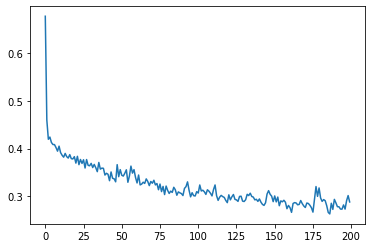

In [65]:
plt.figure()
plt.plot(losses[:200])
plt.show()